In [191]:
from datasets import load_dataset_builder, load_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import torch
import pandas as pd
from operator import itemgetter
from torch.utils.data import default_collate

mpl.rcParams['image.cmap'] = 'gray'

#### hugging face datasets

In [2]:
name = 'fashion_mnist'
ds_builder = load_dataset_builder(name)

In [3]:
ds_builder.info.description

"Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,\nassociated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in\nreplacement for the original MNIST dataset for benchmarking machine learning algorithms.\nIt shares the same image size and structure of training and testing splits.\n"

In [4]:
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [5]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296607, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5233810, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [6]:
dsd = load_dataset(name)

Found cached dataset fashion_mnist (/Users/arun/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48)


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
dsd

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [8]:
dsd['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [9]:
dsd['test']

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [10]:
train, test = dsd['train'], dsd['test']

In [11]:
train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

In [12]:
x, y = ds_builder.info.features

In [13]:
x,y

('image', 'label')

In [14]:
x, y = 'image', 'label'

In [15]:
img = train[0][x]

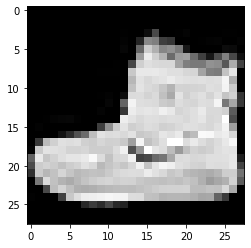

In [16]:
plt.imshow(img)

In [17]:
xb = train[:5][x]
yb = train[:5][y]
xb, yb

([<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>],
 [9, 0, 0, 3, 0])

In [18]:
featy = train.features[y]
featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [19]:
featy.int2str(yb)

['Ankle boot',
 'T - shirt / top',
 'T - shirt / top',
 'Dress',
 'T - shirt / top']

In [102]:
def collate_fn(b):
    return {
        x : torch.stack([TF.to_tensor(ele[x]) for ele in b]),
        y: torch.tensor([ele[y] for ele in b])
    }

In [103]:
dl = DataLoader(train, collate_fn=collate_fn, batch_size=16)

In [104]:
b = next(iter(dl))

In [105]:
b[x].shape, b[y].shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

In [139]:
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

In [140]:
def _transformi(b):
    b[x] = [torch.flatten(TF.to_tensor(ele)) for ele in b[x]]

In [168]:
def _transformiv2(b):
    b[x] = [torch.flatten(TF.to_tensor(ele)) for ele in b[x]]
    return b

In [141]:
transofrmi = inplace(_transformi)

In [171]:
@inplace
def transformiv3(b):
    b[x] = [torch.flatten(TF.to_tensor(ele)) for ele in b[x]]

In [174]:
r = train.with_transform(transformiv3)[0]

In [177]:
pd.DataFrame(r[x].view(28, 28)).style.background_gradient(cmap='gray')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.050980,0.286275,0.000000,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.141176,0.533333,0.498039,0.243137,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.000000,0.400000,0.800000,0.690196,0.525490,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.607843,0.925490,0.811765,0.698039,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.270588,0.811765,0.874510,0.854902,0.847059,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.000000,0.784314,0.909804,0.909804,0.913725,0.898039,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717647,0.882353,0.847059,0.874510,0.894118,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


In [180]:
itemgetter??

In [181]:
d = dict(a=1, b=2, c=3)

In [183]:
ig = itemgetter('a', 'c')

In [185]:
ig(d)

(1, 3)

In [188]:
class D:
    def __getitem__(self, k):
        return 1 if k == 'a' else 2 if k == 'b' else 3 

In [189]:
d = D()

In [190]:
ig(d)

(1, 3)

In [194]:
batch = dict(a=1, b=2), dict(a=3, b=4)

In [196]:
default_collate(batch)

{'a': tensor([1, 3]), 'b': tensor([2, 4])}

In [198]:
def collate_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b):
        return get(default_collate(b))
    return _f

In [200]:
dlf = DataLoader(tdsf, collate_fn=collate_dict(tdsf), batch_size=4)

In [201]:
xb, yb = next(iter(dlf))

In [202]:
xb.shape, yb.shape

(torch.Size([4, 784]), torch.Size([4]))

In [204]:
class DataLoader:
    def __init__(self, *dls):
        self.train, self.valid = dls[:2]
    
    @classmethod
    def from_dd(self, dd, batch_size, as_tuple=True, **kwargs):
        pass